In [1]:
import os
import json
import pandas as pd
from ultralytics import YOLO

from src.data_processing import batch_extract_true_labels
from src.image_processing import process_images
from src.model_utils import predict_boxes
from src.ocr_utils import perform_ocr, extract_original_filename
from src.visualization import display_images_side_by_side

In [2]:
split = 'val'

In [ ]:
# Initialize YOLO model
model = YOLO("runs/detect/train/weights/best.pt")

In [ ]:
# Predict bounding boxes and crop images
preds = predict_boxes(model, split=split, get_cropped_images=False) # use get_cropped_images=True for the first run 

In [ ]:
# Process images and save them to the processed directory
input_folder = f"cropped_images/{split}"
output_folder = f"cropped_images_processed/{split}"
process_images(input_folder, output_folder)

In [ ]:
# Perform OCR on processed images
pred_labels = perform_ocr(split=split, processed=True)

In [4]:
# Extract true labels from the validation set
json_directory = f"data/{split}"
true_labels = batch_extract_true_labels(json_directory)

In [5]:
# pred_labels.to_csv('pred_labels.csv', index=False)
pred_labels = pd.read_csv('pred_labels.csv')

In [6]:
# Add a column for the original filenames in predicted labels
pred_labels['original_filename'] = pred_labels['filename'].apply(extract_original_filename)

# Merge predicted labels with true labels based on the original filename
merged_df = pd.merge(pred_labels, true_labels, left_on='original_filename', right_on='filename', how='inner')

$$
\text{Accuracy} = \frac{\text{Number of fully correct license plates}}{\text{Total number of \textbf{detected} license plates}}
$$

In [8]:
merged_df['correct'] = merged_df['ocr_text'] == merged_df['true_lp_text']

In [10]:
# Compute OCR accuracy
merged_df['correct'] = merged_df['ocr_text'] == merged_df['true_lp_text']
accuracy = merged_df['correct'].sum() / pred_labels.shape[0]
print(f"OCR Accuracy: {accuracy:.2%}")

OCR Accuracy: 1.59%


Corrupt JPEG data: premature end of data segment


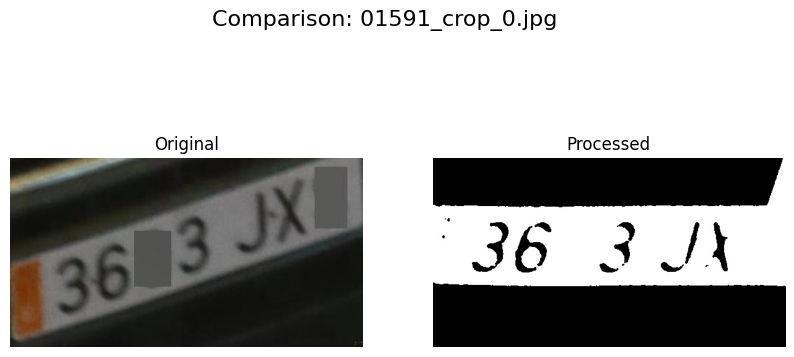

Corrupt JPEG data: premature end of data segment


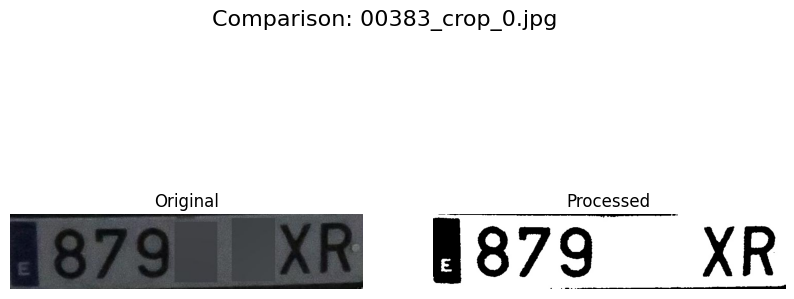

Corrupt JPEG data: premature end of data segment


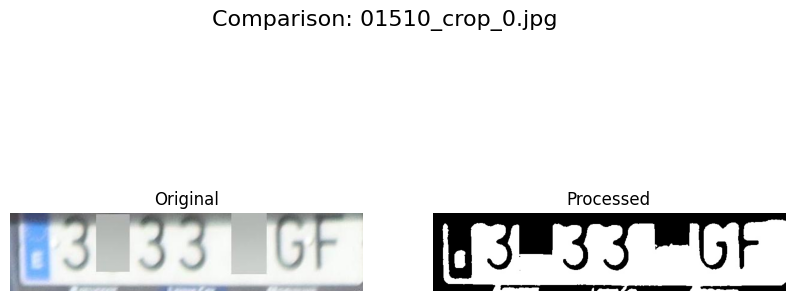

Corrupt JPEG data: premature end of data segment


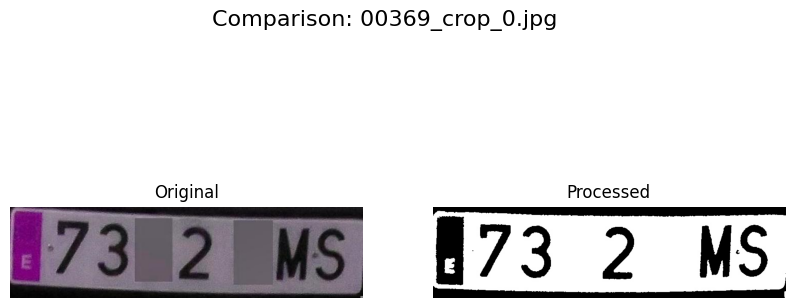

Corrupt JPEG data: premature end of data segment


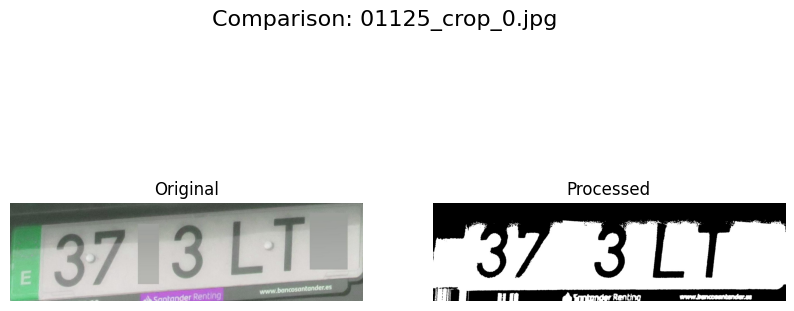

In [11]:
# Directories to compare
dir1 = f"cropped_images/{split}"
dir2 = f"cropped_images_processed/{split}"

# Display images side by side for comparison
display_images_side_by_side(dir1, dir2)